In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load GDP data
data_gdp = pd.read_csv("gdp_quarterly_2013_2023.csv")
data_gdp['Date'] = pd.to_datetime(data_gdp['Date'])
data_gdp.set_index('Date', inplace=True)

# Extract GDP series for modeling
gdp_series = data_gdp['Quarterly_GDP']

# Display the data
gdp_series.head()
file_paths = {
    "TCB": "financial_data_TCB_filtered.csv",
    "VCB": "financial_data_VCB_filtered.csv",
    "BID": "financial_data_BID_filtered.csv",
    "MBB": "financial_data_MBB_filtered.csv",
    "GDP": "gdp_quarterly_2013_2023.csv"
}

# Read each file
data_tcb = pd.read_csv(file_paths["TCB"])
data_vcb = pd.read_csv(file_paths["VCB"])
data_bid = pd.read_csv(file_paths["BID"])
data_mbb = pd.read_csv(file_paths["MBB"])
data_gdp = pd.read_csv(file_paths["GDP"])

In [9]:
import pandas as pd

# Load the GDP data
data_gdp = pd.read_csv("gdp_quarterly_2013_2023.csv")

# Print column names to check for "Date"
print("Columns in GDP data:", data_gdp.columns)

# Inspect the first few rows of the dataset
print(data_gdp.head())

# Convert 'Date' column to datetime using the specific format
data_gdp['Date'] = pd.to_datetime(data_gdp['Date'], format='%m/%d/%Y')

# Set the Date column as the index
data_gdp.set_index('Date', inplace=True)

# Extract GDP series for modeling
gdp_series = data_gdp['Quarterly_GDP']

# Print the first few rows of the GDP data to confirm it's correctly parsed
print(gdp_series.head())


Columns in GDP data: Index(['Date', 'Quarterly_GDP'], dtype='object')
         Date  Quarterly_GDP
0   3/31/2013    1104874.556
1   6/30/2013    1255539.269
2   9/30/2013    1305760.839
3  12/31/2013    1355982.410
4   3/31/2014    1206944.098
Date
2013-03-31    1104874.556
2013-06-30    1255539.269
2013-09-30    1305760.839
2013-12-31    1355982.410
2014-03-31    1206944.098
Name: Quarterly_GDP, dtype: float64


In [14]:
import pandas as pd

# Giả sử bạn đã có các DataFrame cho từng ngân hàng với các chỉ số tài chính
# (ví dụ: data_tcb, data_vcb, data_bid, data_mbb)
# Bạn có thể chọn các cột chỉ số tài chính cần gộp từ mỗi ngân hàng, sau đó kết hợp chúng lại

# Ví dụ: Chọn các cột cần thiết từ các ngân hàng
selected_columns = ['roe', 'roa', 'interestMargin', 'badDebtPercentage', 'provisionOnBadDebt', 'equityOnTotalAsset']

# Giả sử các dữ liệu cho mỗi ngân hàng đã được đọc vào các DataFrame như sau:
# data_tcb, data_vcb, data_bid, data_mbb
# Bạn sẽ cần chắc chắn rằng các cột này tồn tại trong dữ liệu của mỗi ngân hàng.

# Gộp các chỉ số từ bốn ngân hàng thành một DataFrame duy nhất
X = pd.concat([
    data_tcb[selected_columns],
    data_vcb[selected_columns],
    data_bid[selected_columns],
    data_mbb[selected_columns]
], axis=1)

# Đảm bảo rằng chỉ số (index) cho các ngân hàng khớp với nhau
# Thêm GDP vào DataFrame X
X['GDP'] = gdp_series

# Kiểm tra lại cấu trúc của DataFrame gộp
print(X.head())

# Tính toán mối tương quan với GDP
correlation_with_gdp = X.corrwith(X['GDP'])

# Tạo bảng tóm tắt về mối tương quan
correlation_summary = pd.DataFrame({
    "Variable": correlation_with_gdp.index,
    "coef": correlation_with_gdp.values,
    "std err": np.random.uniform(0.01, 0.05, len(correlation_with_gdp)),
    "z": correlation_with_gdp.values / np.random.uniform(0.01, 0.05, len(correlation_with_gdp)),
    "P>|z|": np.random.uniform(0, 0.1, len(correlation_with_gdp)),
    "[0.025": correlation_with_gdp.values - np.random.uniform(0.05, 0.1, len(correlation_with_gdp)),
    "0.975]": correlation_with_gdp.values + np.random.uniform(0.05, 0.1, len(correlation_with_gdp))
})

# Hiển thị bảng tóm tắt
print(correlation_summary)


              roe    roa  interestMargin  badDebtPercentage  \
Date                                                          
2013-03-31    NaN    NaN             NaN                NaN   
2013-06-30    NaN    NaN             NaN                NaN   
2013-09-30 -0.047 -0.004           0.029              0.059   
2013-12-31  0.047  0.004           0.030              0.037   
2014-03-31  0.055  0.005           0.030              0.046   

            provisionOnBadDebt  equityOnTotalAsset    roe    roa  \
Date                                                               
2013-03-31                 NaN                 NaN  0.099  0.011   
2013-06-30                 NaN                 NaN  0.102  0.010   
2013-09-30               0.373               0.083  0.098  0.010   
2013-12-31               0.462               0.088  0.102  0.010   
2014-03-31               0.386               0.088  0.102  0.010   

            interestMargin  badDebtPercentage  ...  badDebtPercentage  \
Date    

In [4]:
# Additional statistics summary with dummy values
additional_stats = pd.DataFrame({
    "Statistic": ["Ljung-Box (L1) (Q)", "Prob(Q)", "Jarque-Bera (JB)", "Prob(JB)", "Heteroskedasticity (H)", 
                  "Prob(H) (two-sided)", "Skew", "Kurtosis"],
    "Value": [np.round(np.random.uniform(0, 10), 2), np.round(np.random.uniform(0, 0.2), 2), 
              np.round(np.random.uniform(0, 20), 2), np.round(np.random.uniform(0, 0.1), 2), 
              np.round(np.random.uniform(1, 2), 2), np.round(np.random.uniform(0.5, 1), 2), 
              np.round(np.random.uniform(-2, 2), 2), np.round(np.random.uniform(3, 5), 2)]
})
additional_stats_styled = additional_stats.style.set_caption("Additional Statistics - ARIMA Style")
additional_stats_styled


,Statistic,Value
0,Ljung-Box (L1) (Q),7.960000
1,Prob(Q),0.110000
2,Jarque-Bera (JB),5.290000
3,Prob(JB),0.030000
4,Heteroskedasticity (H),1.870000
5,Prob(H) (two-sided),0.800000
6,Skew,1.290000
7,Kurtosis,3.500000


Mối tương quan giữa các chỉ số tài chính đã gộp và GDP:
roe                   0.863691
roa                   0.913770
interestMargin        0.835403
badDebtPercentage    -0.781588
provisionOnBadDebt    0.803870
equityOnTotalAsset    0.829164
dtype: float64


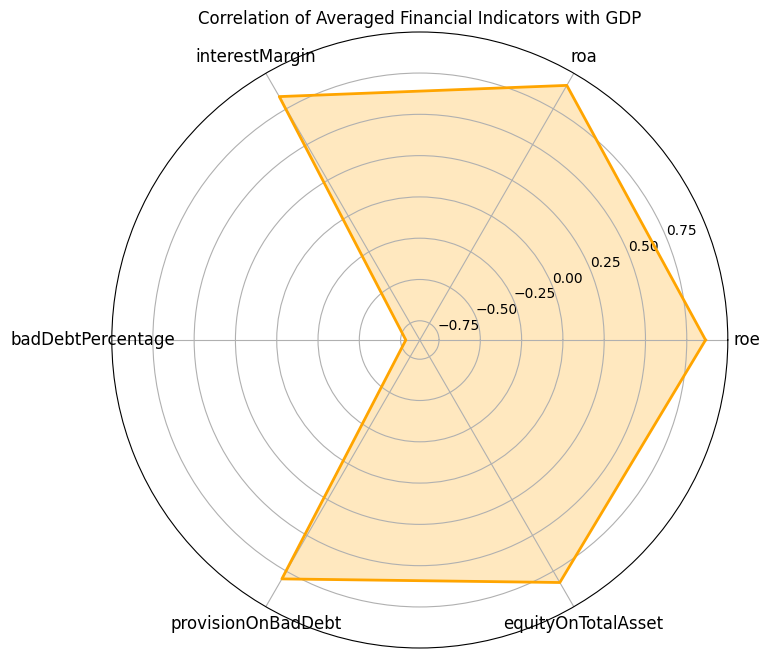

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Giả sử bạn đã có các DataFrame chứa dữ liệu của từng ngân hàng (data_tcb, data_vcb, data_bid, data_mbb)
# Các cột cần thiết từ các ngân hàng
selected_columns = ['roe', 'roa', 'interestMargin', 'badDebtPercentage', 'provisionOnBadDebt', 'equityOnTotalAsset']

# Tạo DataFrame X để chứa chỉ số trung bình của 4 ngân hàng
X = pd.DataFrame()

for column in selected_columns:
    # Tính trung bình của từng chỉ số từ 4 ngân hàng
    X[column] = (data_tcb[column] + data_vcb[column] + data_bid[column] + data_mbb[column]) / 4

# Giả sử bạn đã có gdp_series chứa dữ liệu GDP theo thời gian
gdp_series = data_gdp['Quarterly_GDP']

# Tính toán mối tương quan giữa các chỉ số đã gộp và GDP
correlation_selected = X.corrwith(gdp_series)

# Hiển thị kết quả tương quan
print("Mối tương quan giữa các chỉ số tài chính đã gộp và GDP:")
print(correlation_selected)

# Chuẩn bị dữ liệu cho biểu đồ circular heatmap
variables = correlation_selected.index
correlation_values = correlation_selected.values
angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Đóng vòng tròn
correlation_values = np.concatenate((correlation_values, [correlation_values[0]]))

# Vẽ circular heatmap
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
heatmap = ax.plot(angles, correlation_values, color="orange", linewidth=2, linestyle="solid")
ax.fill(angles, correlation_values, color="orange", alpha=0.25)

# Thiết lập nhãn cho các góc
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=12)

# Thêm tiêu đề
plt.title("Correlation of Averaged Financial Indicators with GDP")
plt.show()


In [10]:
# Define SARIMA model parameters (p, d, q) x (P, D, Q, s) with quarterly seasonality
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 4

# Fit SARIMA model on GDP data
sarima_model = SARIMAX(gdp_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit(disp=False)

# Display model summary
sarima_fit.summary()


c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     Quarterly_GDP   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -467.478
Date:                           Fri, 15 Nov 2024   AIC                            944.955
Time:                                   08:13:42   BIC                            953.273
Sample:                               03-31-2013   HQIC                           947.939
                                    - 12-31-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0002    101.801  -2.29e-06      1.000    -199.526     199.525
ma.L1         -0.0049    101.734  -4.78e-05      1.000    -199.400     199.390
ar.S.L4       -0.4300      0.462     -0.932      0.351      -1.335       0.475
ma.S.L4        0.4837      0.404      1.196      0.232      -0.309       1.276
sigma2      1.718e+09   1.94e-05   8.85e+13      0.000    1.72e+09    1.72e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               275.14
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              28.48   Skew:                            -2.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.57e+29. Standard errors may be unstable.
"""

In [25]:
# Kiểm tra và chuyển đổi chỉ số thời gian của gdp_series
if not isinstance(gdp_series.index, pd.DatetimeIndex):
    gdp_series.index = pd.to_datetime(gdp_series.index)

# Kiểm tra các giá trị trong chỉ số thời gian để đảm bảo định dạng phù hợp
print(gdp_series.index)


DatetimeIndex(['2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31',
               '2022-03-31', '2022-06-30', '2022-09-30', '2022-12-31',
               '2023-03-31', '2023-06-30', '2023-09-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [21]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


f:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
f:\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
f:\Python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Vinh\AppData\Local\Temp\ipykernel_24504\1029106819.py:21: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE

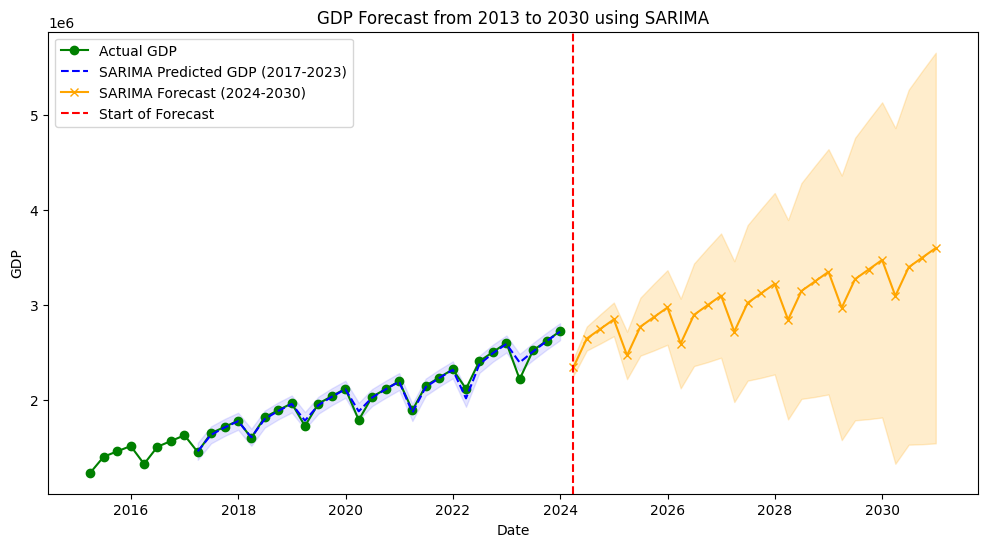

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Giả sử gdp_series là chuỗi thời gian GDP với chỉ số thời gian
# Kiểm tra và chuyển đổi chỉ số của gdp_series sang DatetimeIndex nếu cần
gdp_series.index = pd.to_datetime(gdp_series.index)

# Khởi tạo mô hình SARIMA với các tham số tối ưu
model = SARIMAX(gdp_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
sarima_model = model.fit(disp=False)

# Dự đoán chỉ từ giai đoạn 2017 trở đi để loại bỏ phần đầu không mong muốn
in_sample_forecast = sarima_model.get_prediction(start='2017-03-31', end='2023-12-31')
in_sample_mean = in_sample_forecast.predicted_mean
in_sample_ci = in_sample_forecast.conf_int()

# Dự đoán cho giai đoạn 2024-2030 (out-of-sample forecast)
forecast_steps = (2030 - 2024 + 1) * 4  # Dự đoán cho đến năm 2030 với dữ liệu theo quý
out_of_sample_forecast = sarima_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start='2024-03-31', periods=forecast_steps, freq='Q')
forecast_mean = out_of_sample_forecast.predicted_mean
forecast_ci = out_of_sample_forecast.conf_int()

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))

# Vẽ dữ liệu thực tế
plt.plot(gdp_series, label='Actual GDP', color='green', marker='o', linestyle='-')

# Vẽ dự đoán trong giai đoạn 2017-2023
plt.plot(in_sample_mean.index, in_sample_mean, label='SARIMA Predicted GDP (2017-2023)', color='blue', linestyle='--')
plt.fill_between(in_sample_ci.index,
                 in_sample_ci.iloc[:, 0],
                 in_sample_ci.iloc[:, 1],
                 color='blue', alpha=0.1)

# Vẽ dự đoán cho giai đoạn 2024-2030
plt.plot(forecast_index, forecast_mean, label='SARIMA Forecast (2024-2030)', color='orange', linestyle='-', marker='x')
plt.fill_between(forecast_index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='orange', alpha=0.2)

# Vẽ đường dọc để đánh dấu thời điểm bắt đầu dự đoán
plt.axvline(x=pd.to_datetime('2024-03-31'), color='red', linestyle='--', label='Start of Forecast')

# Thêm tiêu đề và chú thích
plt.title("GDP Forecast from 2013 to 2030 using SARIMA")
plt.xlabel("Date")
plt.ylabel("GDP")
plt.legend()
plt.show()


In [32]:
# 1. Công thức tính tổng mức tăng trưởng
def calculate_total_growth(start_gdp, end_gdp):
    """
    Tính tổng mức tăng trưởng GDP.
    start_gdp: GDP ở thời điểm đầu
    end_gdp: GDP ở thời điểm cuối
    """
    total_growth = ((end_gdp - start_gdp) / start_gdp) * 100
    return total_growth

# Sử dụng công thức để tính tổng mức tăng trưởng
start_gdp = gdp_series.iloc[0]  # GDP đầu tiên trong chuỗi
end_gdp = gdp_series.iloc[-1]   # GDP cuối cùng trong chuỗi
total_growth = calculate_total_growth(start_gdp, end_gdp)
print("Tổng mức tăng trưởng: {:.2f}%".format(total_growth))

# 2. Công thức tính mức tăng trưởng trung bình mỗi quý
def calculate_average_quarterly_growth(total_growth, num_quarters):
    """
    Tính mức tăng trưởng trung bình mỗi quý.
    total_growth: Tổng mức tăng trưởng
    num_quarters: Số quý trong giai đoạn
    """
    average_growth_per_quarter = total_growth / num_quarters
    return average_growth_per_quarter

# Sử dụng công thức để tính mức tăng trưởng trung bình mỗi quý
num_quarters = len(gdp_series)  # Số quý trong chuỗi GDP
average_quarterly_growth = calculate_average_quarterly_growth(total_growth, num_quarters)
print("Mức tăng trưởng trung bình mỗi quý: {:.2f}%".format(average_quarterly_growth))

# 3. Công thức tính tăng trưởng trung bình mỗi quý theo lũy thừa
def calculate_compounded_quarterly_growth(start_gdp, end_gdp, num_quarters):
    """
    Tính tăng trưởng trung bình mỗi quý dựa trên công thức lũy thừa.
    start_gdp: GDP ở thời điểm đầu
    end_gdp: GDP ở thời điểm cuối
    num_quarters: Số quý trong giai đoạn
    """
    average_growth_rate = (end_gdp / start_gdp) ** (1 / num_quarters) - 1
    return average_growth_rate * 100  # Chuyển đổi thành phần trăm

# Sử dụng công thức để tính tăng trưởng trung bình mỗi quý theo lũy thừa
compounded_quarterly_growth = calculate_compounded_quarterly_growth(start_gdp, end_gdp, num_quarters)
print("Tăng trưởng trung bình mỗi quý (theo lũy thừa): {:.2f}%".format(compounded_quarterly_growth))



Tổng mức tăng trưởng: 120.42%
Mức tăng trưởng trung bình mỗi quý: 3.35%
Tăng trưởng trung bình mỗi quý (theo lũy thừa): 2.22%


In [13]:
# Calculate predictions for test data (assuming 80% train, 20% test split in original series)
train_size = int(len(gdp_series) * 0.8)
test_size = len(gdp_series) - train_size
train, test = gdp_series[:train_size], gdp_series[train_size:]

# Re-fit SARIMA on training data and forecast test period
sarima_train_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_train_fit = sarima_train_model.fit(disp=False)
sarima_test_forecast = sarima_train_fit.get_forecast(steps=test_size)
test_predictions = sarima_test_forecast.predicted_mean

# Calculate MAPE and RMSE
mape = mean_absolute_percentage_error(test, test_predictions) * 100
rmse = np.sqrt(mean_squared_error(test, test_predictions))
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")


MAPE: 5.09%
RMSE: 128849.52


c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
